<a href="https://colab.research.google.com/github/Iveynganga/MACHINE-LEARNING-2/blob/main/BostonHousingPCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# 1. Load and Understand the Dataset

In [ ]:
# Load the dataset
data = pd.read_csv('/content/HousingData.csv')

print(data.head())


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None


# 2. Handling Missingness
Handling missingness is essential to ensure that the dataset is clean, complete, and ready for analysis or model training, leading to more reliable and accurate outcomes.There are various strategies to handle missing data including deletion, imputation and other methods such as interpolation.

In [ ]:
# Load the dataset
data = pd.read_csv('/content/HousingData.csv')

# Identify missing values
missing_values = data.isnull().sum()

# Display the missing values count for each feature
print("Missing values in each feature:")
print(missing_values)


Missing values in each feature:
CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


In [ ]:
# Handle missing values by mean imputation
data.fillna(data.mean(), inplace=True)

print(data)

        CRIM    ZN  INDUS  CHAS    NOX     RM        AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.200000  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.900000  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.100000  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.800000  6.0622    3  222   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.200000  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...        ...     ...  ...  ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.100000  2.4786    1  273   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.700000  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.000000  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.300000  2.3889    1  273   
505  0.04741   0.0  11.93   0.0  0.573  6.030  68.518519  2.5050    1  273   

     PTRATIO       B      LSTAT  MEDV  
0       15.3  396.90   

## 3. Standardize the Data
We standardize the dataset to ensure that each variable has a mean of 0 and a standard deviation of 1. PCA is very sensitive to the variance of the variables which makes standardization a necessary step to range the continuous initial variables to ensure each one of them contributes equally to the analysis.

In [ ]:
# Separating out the features
features = data.columns[:-1]  # Excluding the target variable 'MEDV'
x = data.loc[:, features].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

print(x)

[[-0.42232846  0.29644292 -1.31101039 ... -1.45900038  0.44105193
  -1.10414593]
 [-0.41986984 -0.48963852 -0.5997709  ... -0.30309415  0.44105193
  -0.51035272]
 [-0.41987219 -0.48963852 -0.5997709  ... -0.30309415  0.39642699
  -1.23974774]
 ...
 [-0.41595175 -0.48963852  0.1264106  ...  1.17646583  0.44105193
  -1.00993835]
 [-0.41023216 -0.48963852  0.1264106  ...  1.17646583  0.4032249
  -0.8900378 ]
 [-0.41751548 -0.48963852  0.1264106  ...  1.17646583  0.44105193
  -0.69020355]]


## 4. Correlation
Correlation helps to identify highly correlated features and make informed decisions on feature selection, transformation, or dimensionality reduction techniques like PCA. PCA can help by transforming correlated features into uncorrelated principal components.

In [ ]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Display the correlation matrix
print("Correlation matrix:")
print(correlation_matrix)


Correlation matrix:
             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.182930  0.391161 -0.052223  0.410377 -0.215434  0.344934   
ZN      -0.182930  1.000000 -0.513336 -0.036147 -0.502287  0.316550 -0.541274   
INDUS    0.391161 -0.513336  1.000000  0.058035  0.740965 -0.381457  0.614592   
CHAS    -0.052223 -0.036147  0.058035  1.000000  0.073286  0.102284  0.075206   
NOX      0.410377 -0.502287  0.740965  0.073286  1.000000 -0.302188  0.711461   
RM      -0.215434  0.316550 -0.381457  0.102284 -0.302188  1.000000 -0.241351   
AGE      0.344934 -0.541274  0.614592  0.075206  0.711461 -0.241351  1.000000   
DIS     -0.366523  0.638388 -0.699639 -0.091680 -0.769230  0.205246 -0.724353   
RAD      0.608886 -0.306316  0.593176  0.001425  0.611441 -0.209847  0.449989   
TAX      0.566528 -0.308334  0.716062 -0.031483  0.668023 -0.292048  0.500589   
PTRATIO  0.273384 -0.403085  0.384806 -0.109310  0.188933 -0.355501  0.262723   
B       

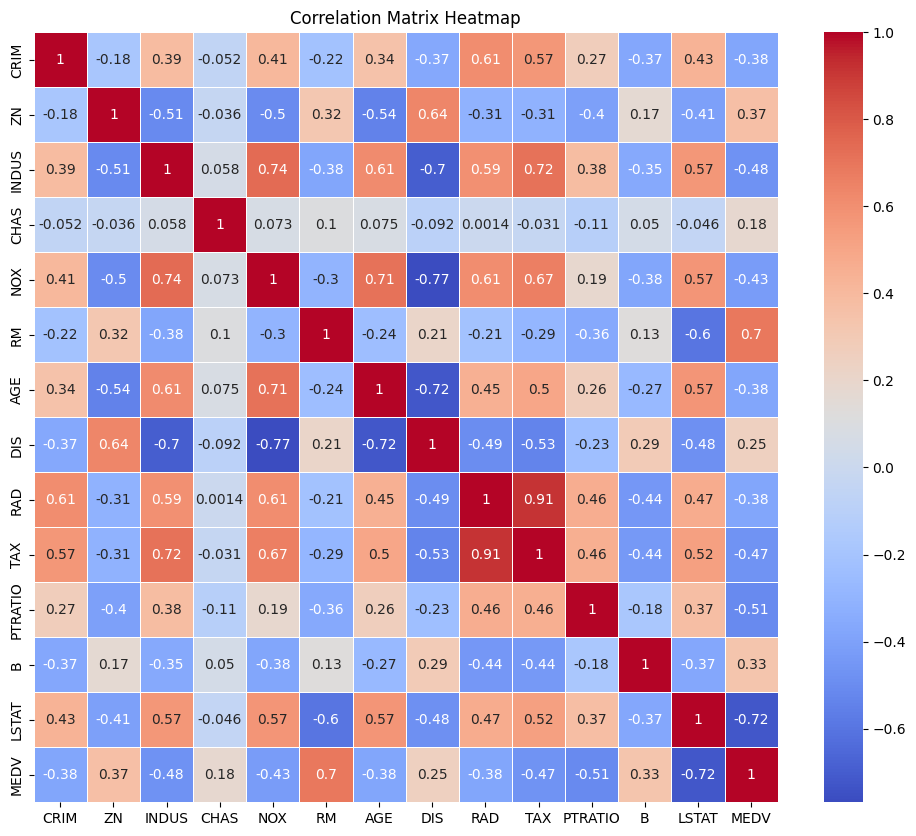

In [ ]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


## 5. Apply PCA
PCA reduces the dimensionality of the dataset while preserving the most important patterns or relationships between the variables without any prior knowledge of the target variables. This makes the datasets easier to work with.

In [ ]:
from sklearn.decomposition import PCA

# Performing PCA
pca = PCA(n_components=2)  # Let's reduce to 2 components for visualization
principalComponents = pca.fit_transform(x)

# Creating a DataFrame with the principal components
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])
print(principalDf.head())


   principal component 1  principal component 2
0              -2.122202               0.743666
1              -1.468893               0.592887
2              -2.092354               0.593596
3              -2.635070              -0.015014
4              -2.158231               0.017379


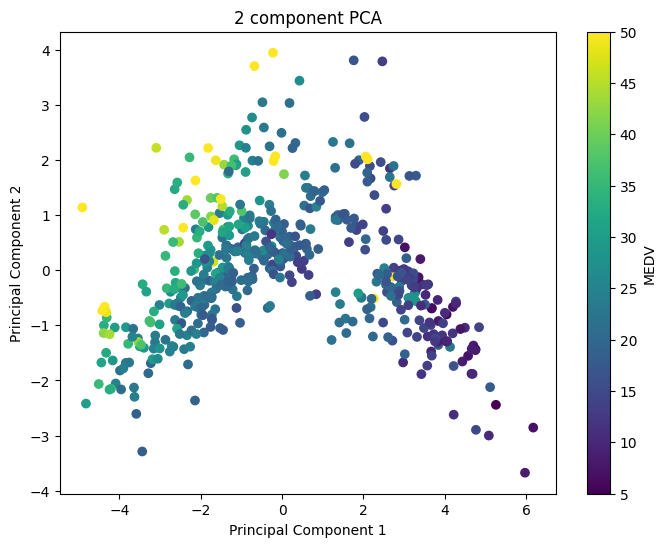

In [ ]:
import matplotlib.pyplot as plt

# Visualizing the 2 principal components
plt.figure(figsize=(8, 6))
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'], c=data['MEDV'], cmap='viridis')
plt.colorbar(label='MEDV')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2 component PCA')
plt.show()


# 6. Explained Variance
Explained variance is a measure of how much of the total variance in the original dataset is explained by each principal component. This is useful when you want to know how many principal components you need to retain in order to capture a certain percentage of the total variance in the original dataset.

In [ ]:
# Explained variance
explained_variance = pca.explained_variance_ratio_
print("Explained variance by each component:")
print(explained_variance)


Explained variance by each component:
[0.46383049 0.10715436]
